In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\fish_market\Fish.csv')

# Display basic information
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

=== DATASET OVERVIEW ===
Dataset shape: (159, 7)

First 5 rows:
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [15]:
# Identify input features and NEW target variable
print("\n=== FEATURES AND TARGET ===")
print("Input features: Weight, Length1, Length2, Length3, Height, Width")
print("Target variable: Species (Classification)")

# Check data types
print("\n=== DATA TYPES ===")
print(df.dtypes)

# Check for missing values and duplicates
print("\n=== DATA QUALITY ===")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")


=== FEATURES AND TARGET ===
Input features: Weight, Length1, Length2, Length3, Height, Width
Target variable: Species (Classification)

=== DATA TYPES ===
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

=== DATA QUALITY ===
Missing values:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Duplicate rows: 0


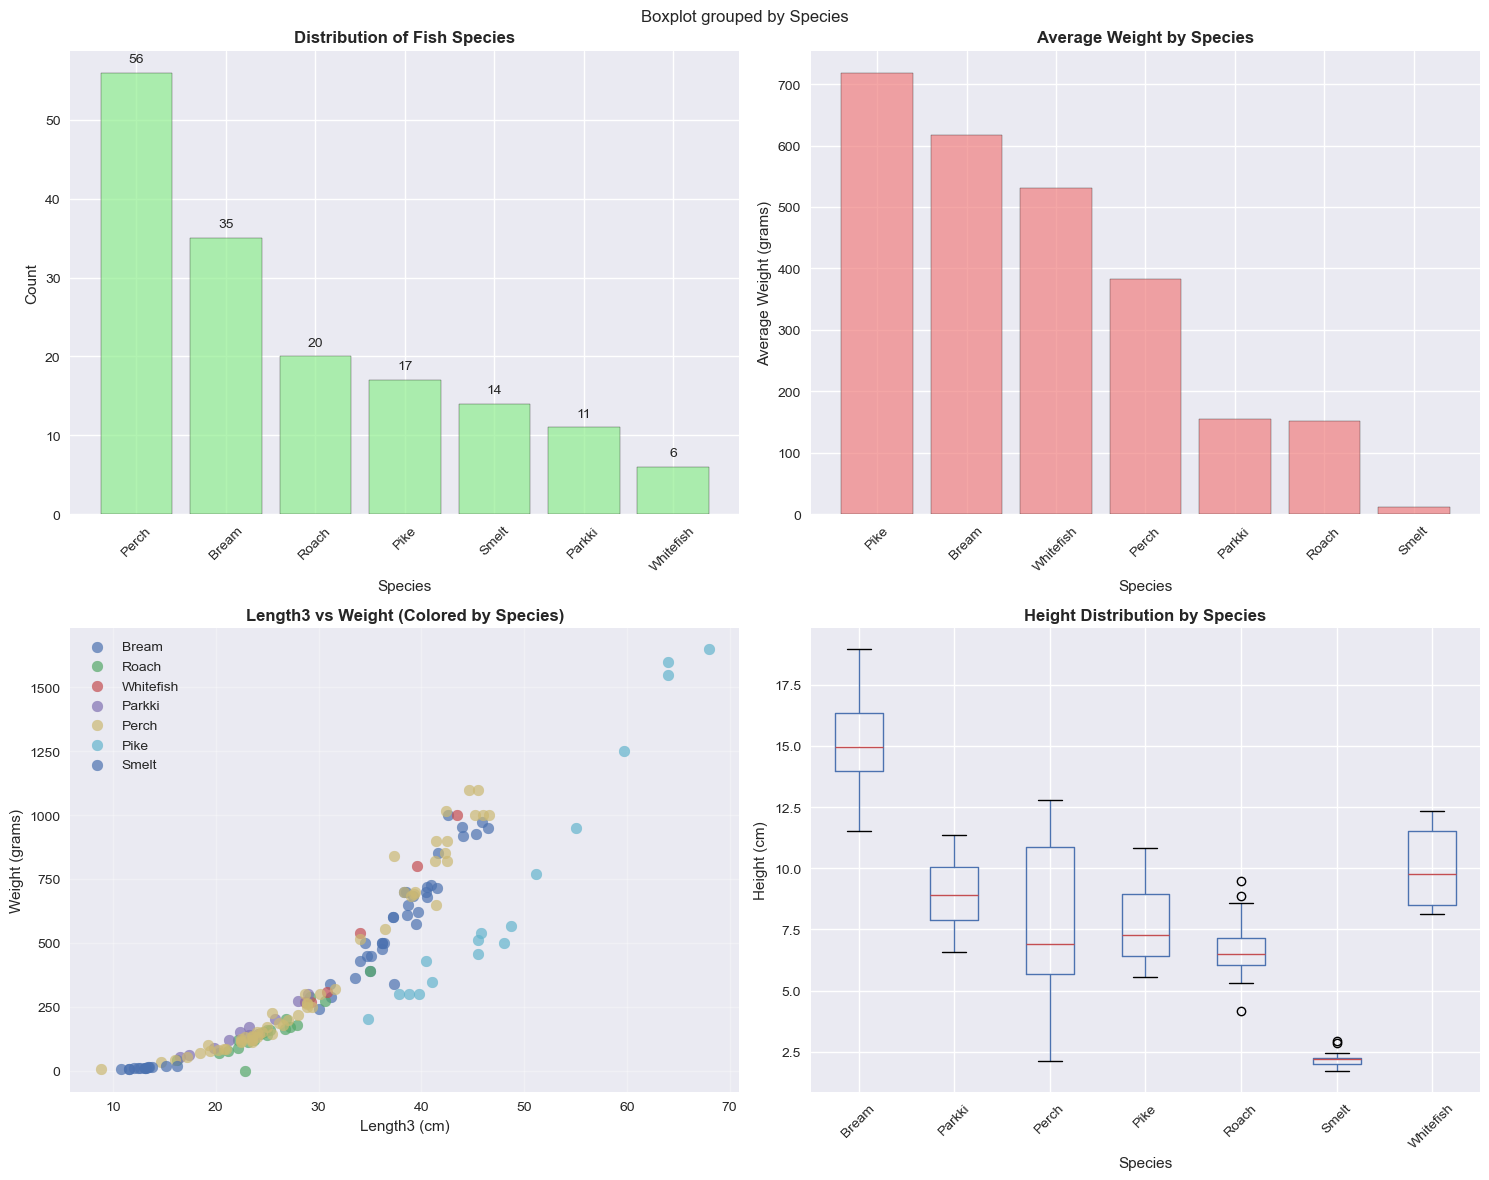

In [16]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Fish Species Classification Analysis', fontsize=16, fontweight='bold')

# Plot 1: Distribution of the target variable (Species)
species_counts = df['Species'].value_counts()
axes[0,0].bar(species_counts.index, species_counts.values, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Fish Species', fontweight='bold')
axes[0,0].set_xlabel('Species')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Add count labels on bars
for i, v in enumerate(species_counts.values):
    axes[0,0].text(i, v + 1, str(v), ha='center', va='bottom')

# Plot 2: Average Weight by Species
species_avg_weight = df.groupby('Species')['Weight'].mean().sort_values(ascending=False)
axes[0,1].bar(species_avg_weight.index, species_avg_weight.values, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Average Weight by Species', fontweight='bold')
axes[0,1].set_xlabel('Species')
axes[0,1].set_ylabel('Average Weight (grams)')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Scatter plot - Length3 vs Weight colored by Species
species_colors = {'Bream': 'red', 'Roach': 'blue', 'Whitefish': 'green', 
                  'Parkki': 'orange', 'Perch': 'purple', 'Pike': 'brown', 'Smelt': 'pink'}

for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    axes[1,0].scatter(species_data['Length3'], species_data['Weight'], 
                     label=species, alpha=0.7, s=60)

axes[1,0].set_title('Length3 vs Weight (Colored by Species)', fontweight='bold')
axes[1,0].set_xlabel('Length3 (cm)')
axes[1,0].set_ylabel('Weight (grams)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Boxplot of Height by Species
df.boxplot(column='Height', by='Species', ax=axes[1,1])
axes[1,1].set_title('Height Distribution by Species', fontweight='bold')
axes[1,1].set_xlabel('Species')
axes[1,1].set_ylabel('Height (cm)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== PAIRPLOT BY SPECIES ===


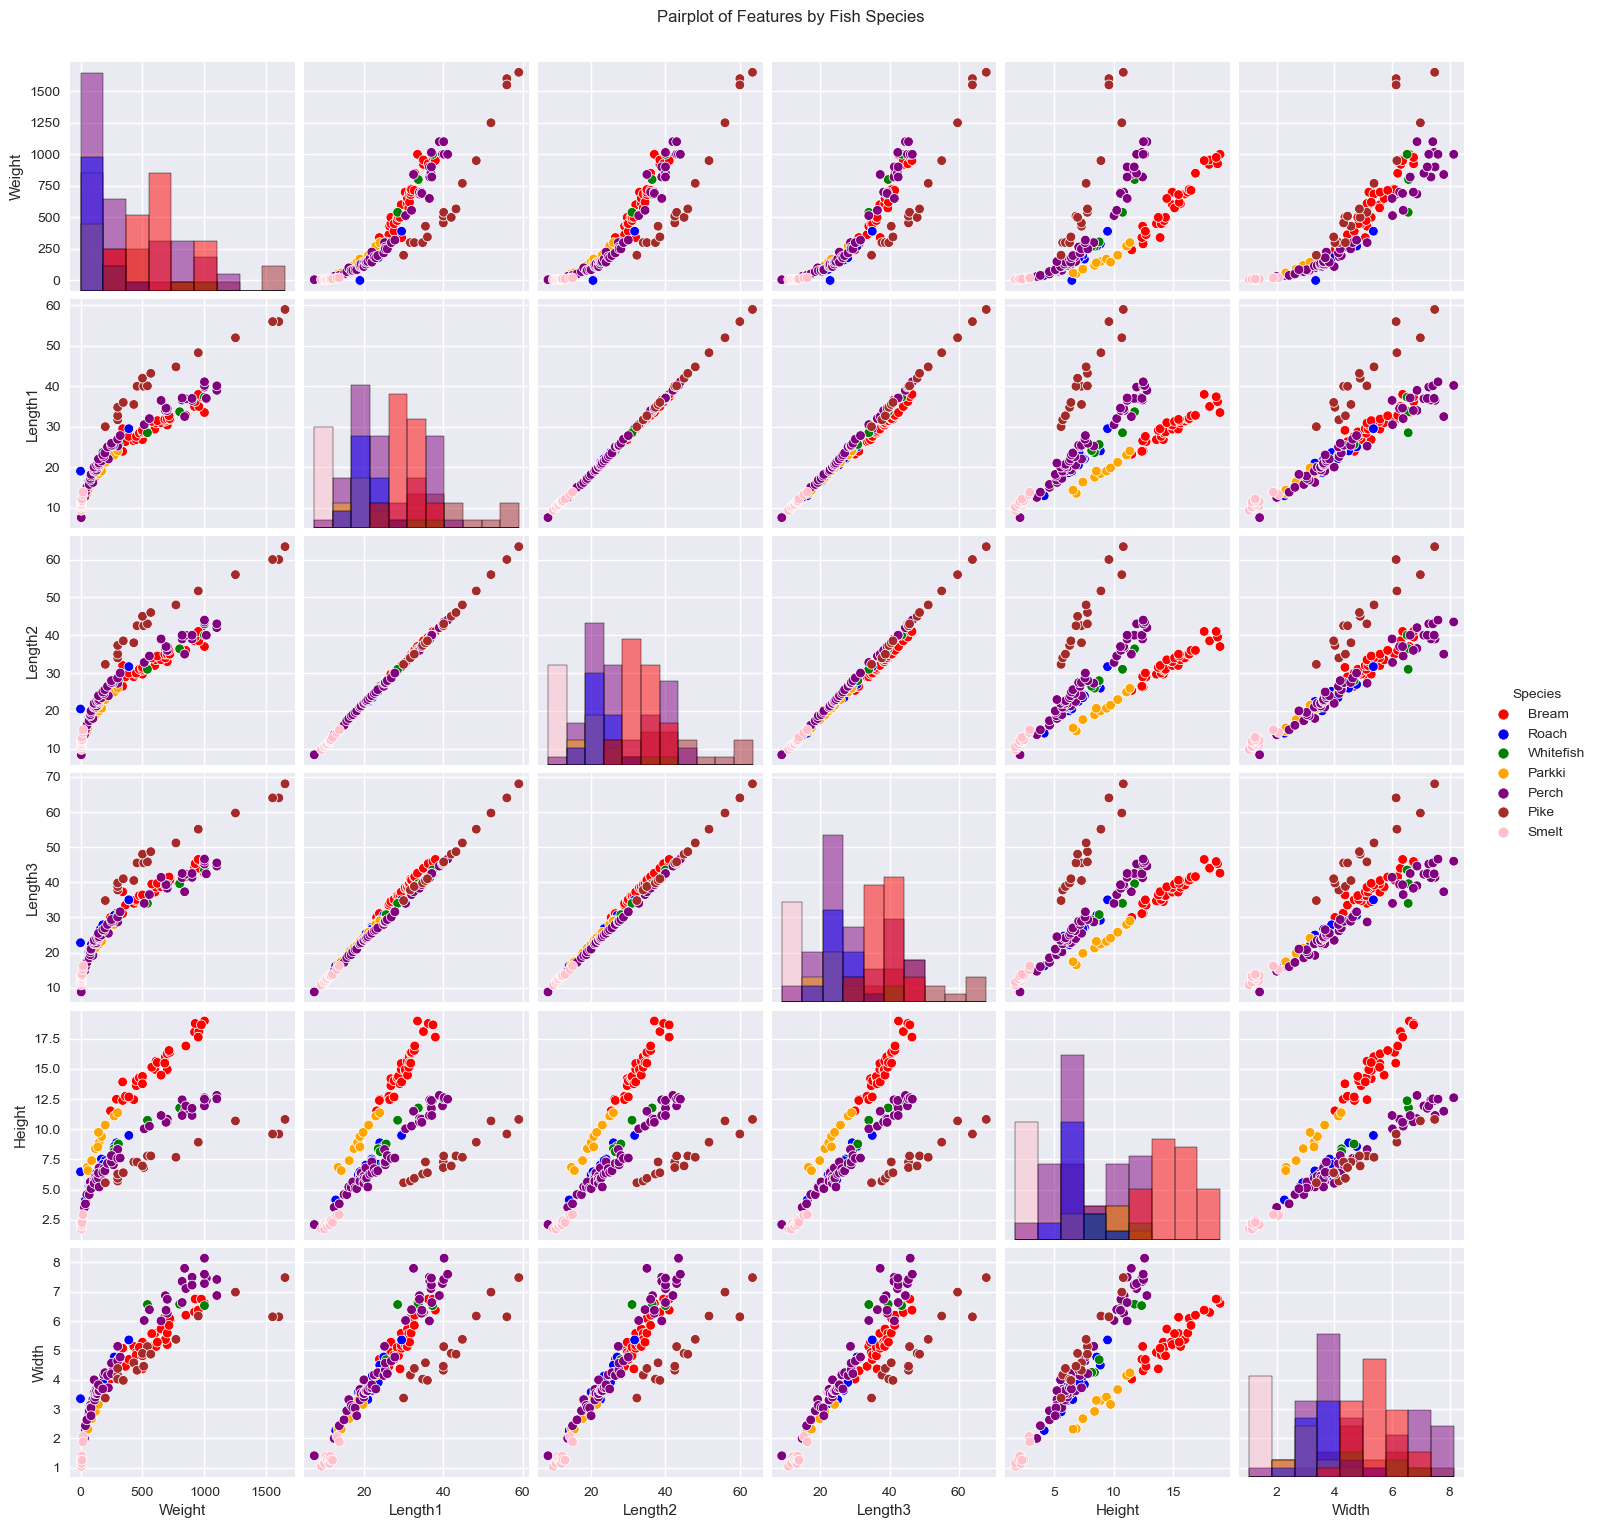

In [17]:
# Additional visualization: Pairplot by Species
print("\n=== PAIRPLOT BY SPECIES ===")
sns.pairplot(df, hue='Species', diag_kind='hist', palette=species_colors, height=2.5)
plt.suptitle('Pairplot of Features by Fish Species', y=1.02)
plt.show()

In [18]:
# Statistical summary by species
print("\n=== STATISTICAL SUMMARY BY SPECIES ===")
for species in df['Species'].unique():
    print(f"\n--- {species} ---")
    species_data = df[df['Species'] == species]
    print(f"Count: {len(species_data)}")
    print(f"Weight: {species_data['Weight'].mean():.1f} ± {species_data['Weight'].std():.1f}g")
    print(f"Length3: {species_data['Length3'].mean():.1f} ± {species_data['Length3'].std():.1f}cm")
    print(f"Height: {species_data['Height'].mean():.1f} ± {species_data['Height'].std():.1f}cm")


=== STATISTICAL SUMMARY BY SPECIES ===

--- Bream ---
Count: 35
Weight: 617.8 ± 209.2g
Length3: 38.4 ± 4.2cm
Height: 15.2 ± 2.0cm

--- Roach ---
Count: 20
Weight: 152.1 ± 88.8g
Length3: 25.0 ± 4.0cm
Height: 6.7 ± 1.3cm

--- Whitefish ---
Count: 6
Weight: 531.0 ± 309.6g
Length3: 34.3 ± 6.0cm
Height: 10.0 ± 1.8cm

--- Parkki ---
Count: 11
Weight: 154.8 ± 78.8g
Length3: 22.8 ± 4.0cm
Height: 9.0 ± 1.6cm

--- Perch ---
Count: 56
Weight: 382.2 ± 347.6g
Length3: 29.6 ± 9.5cm
Height: 7.9 ± 2.9cm

--- Pike ---
Count: 17
Weight: 718.7 ± 494.1g
Length3: 48.7 ± 10.2cm
Height: 7.7 ± 1.7cm

--- Smelt ---
Count: 14
Weight: 11.2 ± 4.1g
Length3: 13.0 ± 1.4cm
Height: 2.2 ± 0.4cm


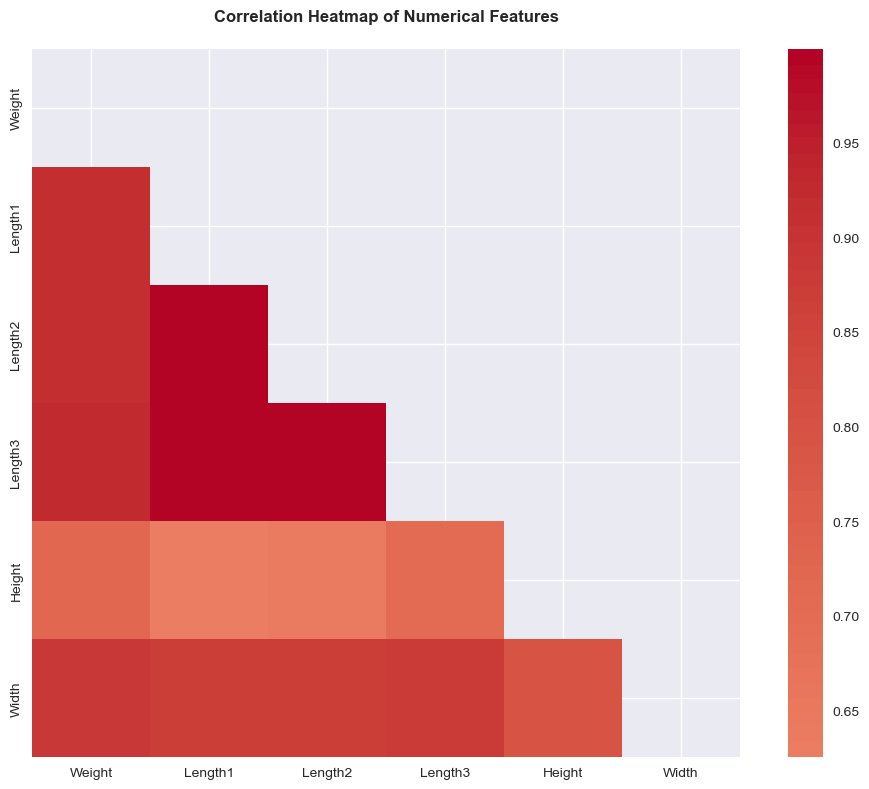

In [19]:
# Correlation analysis for classification insights
plt.figure(figsize=(10, 8))
numeric_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
correlation_matrix = df[numeric_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import pickle
import time

print("=== DATA PREPROCESSING FOR REGRESSION ===")
print("Target: Species (encoded as numeric for regression)")

# 3.1 Encode categorical target variable (Species)
le = LabelEncoder()
y_encoded = le.fit_transform(df['Species'])
print(f"Species encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 3.2 Prepare features (all numerical columns except Species)
X = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = y_encoded  # Encoded species as numeric target for regression

print(f"Feature shapes: X {X.shape}, y {y.shape}")

# 3.3 Check for missing values
print("\nChecking for missing values...")
print(X.isnull().sum())

# 3.4 Scale numerical features
print("\nScaling numerical features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 3.5 Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

=== DATA PREPROCESSING FOR REGRESSION ===
Target: Species (encoded as numeric for regression)
Species encoding: {'Bream': 0, 'Parkki': 1, 'Perch': 2, 'Pike': 3, 'Roach': 4, 'Smelt': 5, 'Whitefish': 6}
Feature shapes: X (159, 6), y (159,)

Checking for missing values...
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Scaling numerical features...
Training set: 127 samples
Testing set: 32 samples


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
# Initialize all regressors
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_jobs=-1),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost Regressor': CatBoostRegressor(random_state=42, verbose=False)
}

# Dictionary to store results
results = {}
best_model = None
best_score = -np.inf

print("=== MODEL TRAINING (REGRESSORS) ===")
print("Training all regressors to predict Species...\n")

# Train and evaluate each model
for name, model in models.items():
    print(f"🔧 Training {name}...")
    start_time = time.time()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate classification accuracy (by rounding predictions to nearest integer)
    y_pred_class = np.round(y_pred).astype(int)
    # Ensure predictions are within valid class range
    y_pred_class = np.clip(y_pred_class, 0, len(le.classes_)-1)
    accuracy = accuracy_score(y_test, y_pred_class)
    
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'model': model,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'accuracy': accuracy,
        'training_time': training_time
    }
    
    print(f"✅ {name} trained in {training_time:.2f}s")
    print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
    print(f"   Classification Accuracy: {accuracy:.4f}\n")
    
    # Update best model based on R² score
    if r2 > best_score:
        best_score = r2
        best_model = name

print("=== MODEL COMPARISON ===")
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[name]['mae'] for name in results.keys()],
    'RMSE': [results[name]['rmse'] for name in results.keys()],
    'R² Score': [results[name]['r2'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Training Time (s)': [results[name]['training_time'] for name in results.keys()]
}).sort_values('R² Score', ascending=False)

print(comparison_df.round(4))

=== MODEL TRAINING (REGRESSORS) ===
Training all regressors to predict Species...

🔧 Training Decision Tree Regressor...
✅ Decision Tree Regressor trained in 0.00s
   MAE: 0.72, RMSE: 1.63, R²: 0.3806
   Classification Accuracy: 0.7500

🔧 Training Random Forest Regressor...
✅ Random Forest Regressor trained in 0.59s
   MAE: 0.66, RMSE: 1.34, R²: 0.5815
   Classification Accuracy: 0.7188

🔧 Training AdaBoost Regressor...
✅ AdaBoost Regressor trained in 0.20s
   MAE: 0.81, RMSE: 1.31, R²: 0.6022
   Classification Accuracy: 0.4688

🔧 Training XGBoost Regressor...
✅ XGBoost Regressor trained in 0.22s
   MAE: 0.81, RMSE: 1.48, R²: 0.4877
   Classification Accuracy: 0.5938

🔧 Training CatBoost Regressor...
✅ CatBoost Regressor trained in 3.09s
   MAE: 0.55, RMSE: 1.04, R²: 0.7486
   Classification Accuracy: 0.7188

=== MODEL COMPARISON ===
                     Model     MAE    RMSE  R² Score  Accuracy  \
4       CatBoost Regressor  0.5519  1.0383    0.7486    0.7188   
2       AdaBoost Regre

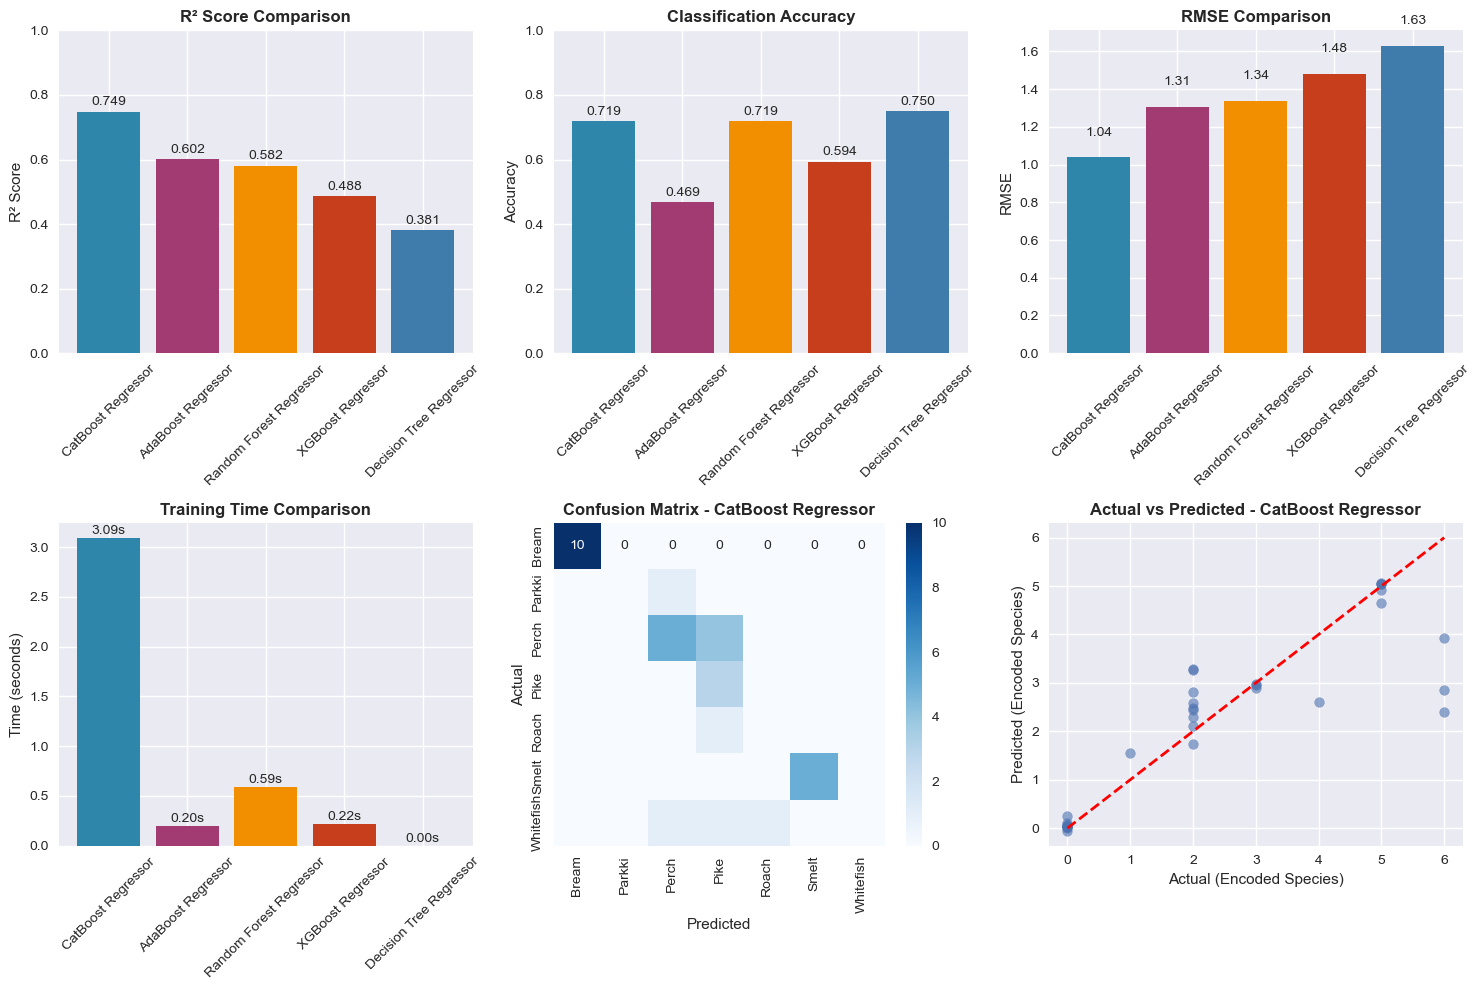

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize model performance
plt.figure(figsize=(15, 10))

# Plot 1: R² Scores
plt.subplot(2, 3, 1)
models_sorted = comparison_df['Model'].values
r2_scores = comparison_df['R² Score'].values
bars = plt.bar(models_sorted, r2_scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3F7CAC'])
plt.title('R² Score Comparison', fontweight='bold')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar, value in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Plot 2: Accuracy Scores
plt.subplot(2, 3, 2)
accuracy_scores = comparison_df['Accuracy'].values
bars = plt.bar(models_sorted, accuracy_scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3F7CAC'])
plt.title('Classification Accuracy', fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar, value in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Plot 3: RMSE Comparison
plt.subplot(2, 3, 3)
rmse_scores = comparison_df['RMSE'].values
bars = plt.bar(models_sorted, rmse_scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3F7CAC'])
plt.title('RMSE Comparison', fontweight='bold')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

for bar, value in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.2f}', ha='center', va='bottom')

# Plot 4: Training Time Comparison
plt.subplot(2, 3, 4)
time_scores = comparison_df['Training Time (s)'].values
bars = plt.bar(models_sorted, time_scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3F7CAC'])
plt.title('Training Time Comparison', fontweight='bold')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)

for bar, value in zip(bars, time_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.2f}s', ha='center', va='bottom')

# Plot 5: Confusion Matrix for Best Model
plt.subplot(2, 3, 5)
best_model_name = comparison_df.iloc[0]['Model']
best_model_obj = results[best_model_name]['model']
y_pred_best = best_model_obj.predict(X_test)
y_pred_class = np.round(y_pred_best).astype(int)
y_pred_class = np.clip(y_pred_class, 0, len(le.classes_)-1)

cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 6: Actual vs Predicted (Regression)
plt.subplot(2, 3, 6)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual (Encoded Species)')
plt.ylabel('Predicted (Encoded Species)')
plt.title(f'Actual vs Predicted - {best_model_name}', fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
# Create and save the best model pickle file
print("=== SAVING BEST MODEL ===")
print(f"🏆 Best Model: {best_model} (R²: {best_score:.4f}, Accuracy: {results[best_model]['accuracy']:.4f})")

# Get the best model object
best_model_obj = results[best_model]['model']

# Create a dictionary containing the model and preprocessing objects
model_package = {
    'model': best_model_obj,
    'scaler': scaler,
    'label_encoder': le,
    'feature_names': X.columns.tolist(),
    'model_name': best_model,
    'classes': le.classes_.tolist()
}

# Save to pickle file
with open('best_fish_species_regressor.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("✅ Best model saved as 'best_fish_species_regressor.pkl'")

# Verify the pickle file can be loaded
with open('best_fish_species_regressor.pkl', 'rb') as f:
    loaded_package = pickle.load(f)

print("✅ Model verification successful!")
print(f"   Model: {loaded_package['model_name']}")
print(f"   Features: {loaded_package['feature_names']}")
print(f"   Classes: {loaded_package['classes']}")

=== SAVING BEST MODEL ===
🏆 Best Model: CatBoost Regressor (R²: 0.7486, Accuracy: 0.7188)
✅ Best model saved as 'best_fish_species_regressor.pkl'
✅ Model verification successful!
   Model: CatBoost Regressor
   Features: ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
   Classes: ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']



=== FEATURE IMPORTANCE ANALYSIS ===


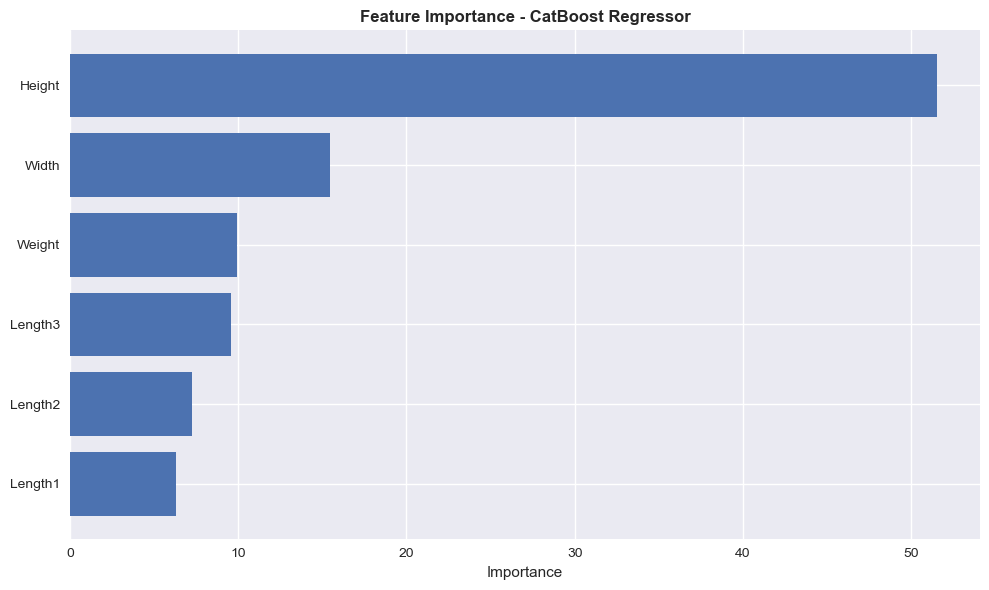

Feature Importance Rankings:
1. Length1: 6.2891
2. Length2: 7.2618
3. Length3: 9.5641
4. Weight: 9.9179
5. Width: 15.4585
6. Height: 51.5086

=== FINAL MODEL PERFORMANCE SUMMARY ===
Best Model: CatBoost Regressor
R² Score: 0.7486
Classification Accuracy: 0.7188
RMSE: 1.04
MAE: 0.55
Training Time: 3.09 seconds
Number of Features: 6
Number of Classes: 7
Training Samples: 127
Test Samples: 32


In [24]:
# Feature importance analysis
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

if hasattr(best_model_obj, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_obj.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title(f'Feature Importance - {best_model}', fontweight='bold')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("Feature Importance Rankings:")
    for i, (feature, imp) in enumerate(zip(feature_importance['feature'], 
                                          feature_importance['importance']), 1):
        print(f"{i}. {feature}: {imp:.4f}")

# Final summary
print("\n=== FINAL MODEL PERFORMANCE SUMMARY ===")
print(f"Best Model: {best_model}")
print(f"R² Score: {best_score:.4f}")
print(f"Classification Accuracy: {results[best_model]['accuracy']:.4f}")
print(f"RMSE: {results[best_model]['rmse']:.2f}")
print(f"MAE: {results[best_model]['mae']:.2f}")
print(f"Training Time: {results[best_model]['training_time']:.2f} seconds")
print(f"Number of Features: {X.shape[1]}")
print(f"Number of Classes: {len(le.classes_)}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

In [13]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
import catboost
print(catboost.__version__)


1.2.8
